In [18]:
import numpy as np
import pandas as pd
import glob

#Collecting files for later importing

path = r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\Datasets'''
filenames = list(glob.glob(path + "\*.csv"))
file = filenames[0]

BTC_df = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
BTC_df.columns = [BTC_df.columns[0]+"_"+file[-9:-4]]
for file in filenames[1:]:
    load = pd.read_csv(file, parse_dates=['Date'], index_col='Date')
    load.columns = [load.columns[0]+"_"+file[-9:-4]]
    BTC_df = pd.merge(BTC_df, load, left_index=True, right_index=True)

BTC_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3259 entries, 2017-12-27 to 2009-01-03
Data columns (total 10 columns):
Value_AVBLS    3259 non-null float64
Value_CPTRA    3259 non-null float64
Value_MKPRU    3259 non-null float64
Value_MWNTD    3259 non-null float64
Value_MWNUS    3259 non-null float64
Value_NADDU    3259 non-null float64
Value_NTRAN    3259 non-null float64
Value_NTRAT    3259 non-null float64
Value_NTRBL    3259 non-null float64
Value_TRVOU    3259 non-null float64
dtypes: float64(10)
memory usage: 280.1 KB


Data Dictionary:

CSV legend

BCHAIN-AVBLS - average block size

BCHAIN-MKPRU - BTC Market PRice USD

BCHAIN-MWNTD - Number of transactions made by My Wallet Users per day.

BCHAIN-MWNUS - Number of wallets hosts using our My Wallet Service.

BCHAIN-NADDU - Number of unique bitcoin addresses used per day.

BCHAIN-NTRAN - Total number of unique bitcoin transactions per day.

BCHAIN-NTRAT - Total number of unique bitcoin transactions per day (cumulative).

BCHAIN-NTRBL - The average number of transactions per block.

BCHAIN-TRVOU - Data showing the USD trade volume from the top exchanges.

In [2]:
#getting a baseline of statistical descriptors of each series
BTC_df.describe()


,Value_AVBLS,Value_CPTRA,Value_MKPRU,Value_MWNTD,Value_MWNUS,Value_NADDU,Value_NTRAN,Value_NTRAT,Value_NTRBL,Value_TRVOU
count,3259.000000,3259.000000,3259.000000,3259.000000,3.259000e+03,3.259000e+03,3259.000000,3.259000e+03,3259.000000,3.259000e+03
mean,0.290288,11.587814,583.348361,23879.431421,3.135797e+06,1.619941e+05,86324.199448,5.618708e+07,569.288739,4.631122e+07
std,0.339422,16.552431,1728.980041,29718.897203,4.911135e+06,1.973924e+05,100720.218666,7.615171e+07,670.569577,2.386159e+08
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000e+00,0.000000,1.000000e+00,1.000000,0.000000e+00
25%,0.005244,2.110517,0.950000,0.000000,2.000000e+00,3.439500e+03,2507.500000,3.775995e+05,15.000000,1.564718e+04
50%,0.138530,6.812223,108.000000,7359.000000,3.193120e+05,5.790400e+04,51666.000000,1.971206e+07,304.000000,1.506129e+06
75%,0.521351,11.489526,470.360000,48088.000000,4.225244e+06,2.616740e+05,133722.000000,8.333256e+07,918.500000,1.499627e+07
max,1.070000,161.680000,19498.680000,122796.000000,2.127288e+07,1.072861e+06,490644.000000,2.862143e+08,2722.620000,5.352016e+09


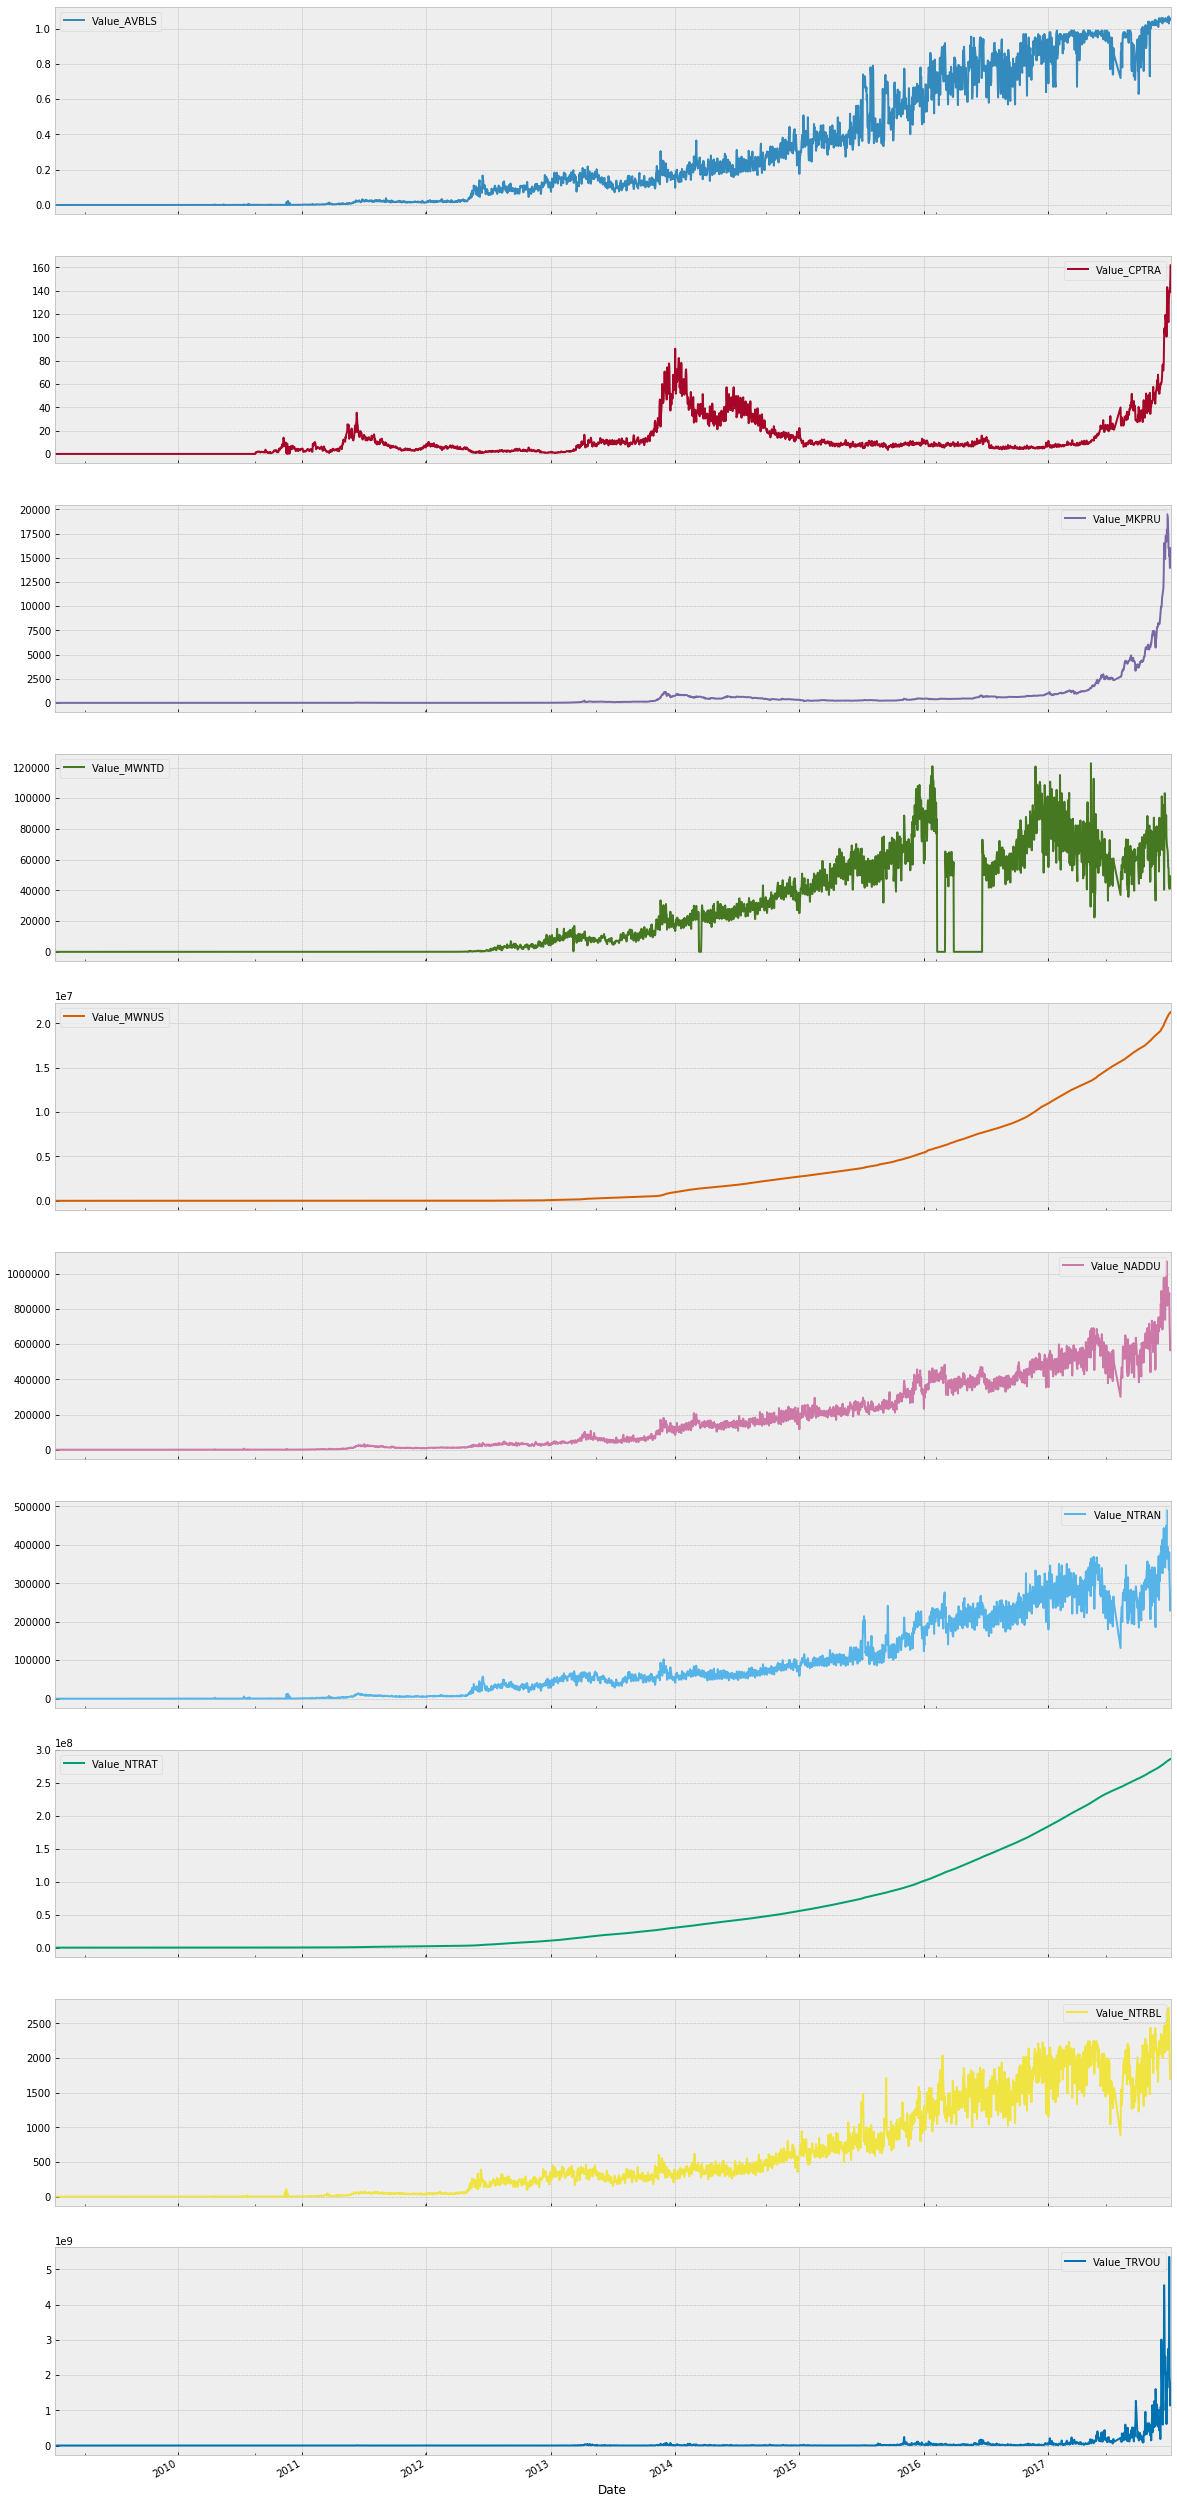

In [3]:
#plotting the compiled dataframe for visual inspection and interpretation
#importing data viz library

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

BTC_df.plot(subplots=True, figsize=(20,50))
plt.show()

#we see Value_MWNTD has some zero values, may warrant further investigation if choose to use this series

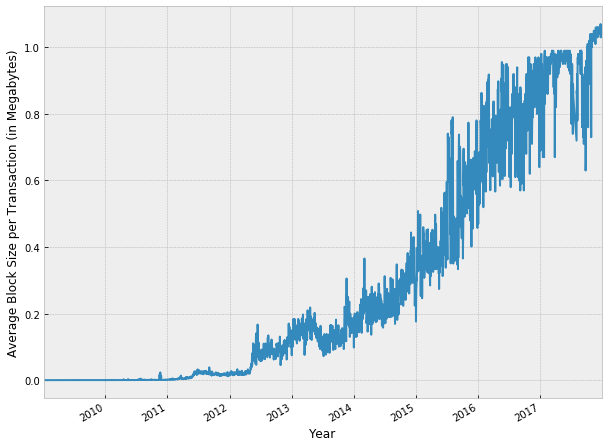

In [4]:
plt.rcParams['figure.figsize'] = (10,8)
BTC_df['Value_AVBLS'].plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()
#AVG Block Size is 0.28, system is maxed at 1MB - not significant in analysis as this measure refers to the data size of the block sent to the chain
#Another musing worth exploring... if block size has been at max for a substantial amount of time.  This either means the market
#is highly liquid and has enough market participants (or indicating that the general public is now present in market)

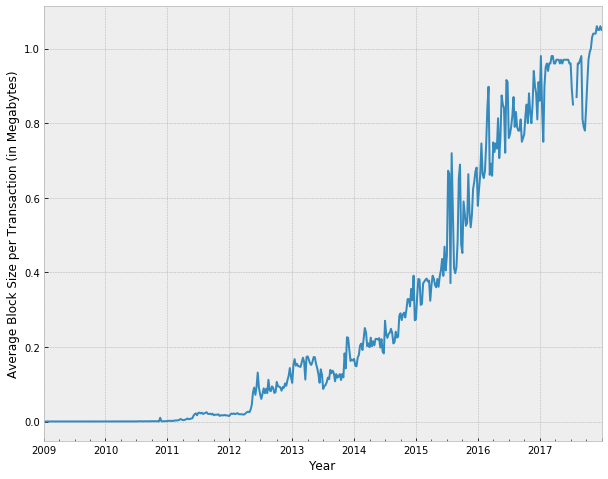

In [5]:
BTC_df['Value_AVBLS'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Average Block Size per Transaction (in Megabytes)')
plt.show()

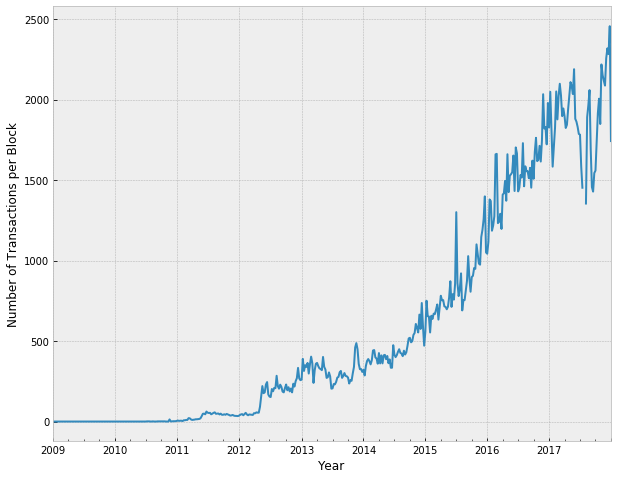

In [6]:
BTC_df['Value_NTRBL'].resample('W').median().plot()
plt.xlabel('Year')
plt.ylabel('Number of Transactions per Block')
plt.show()


Though the number of transactions in each block (added to the chain) is trending higher since 2011,
we see a bit of a drop off in mid-2017, this may be explain by the meteoric rise in the price of BTC.
That is, few transactions are needed to move an equivalent amount of value.  (Will need to plot against BTC price to  see this relationship)

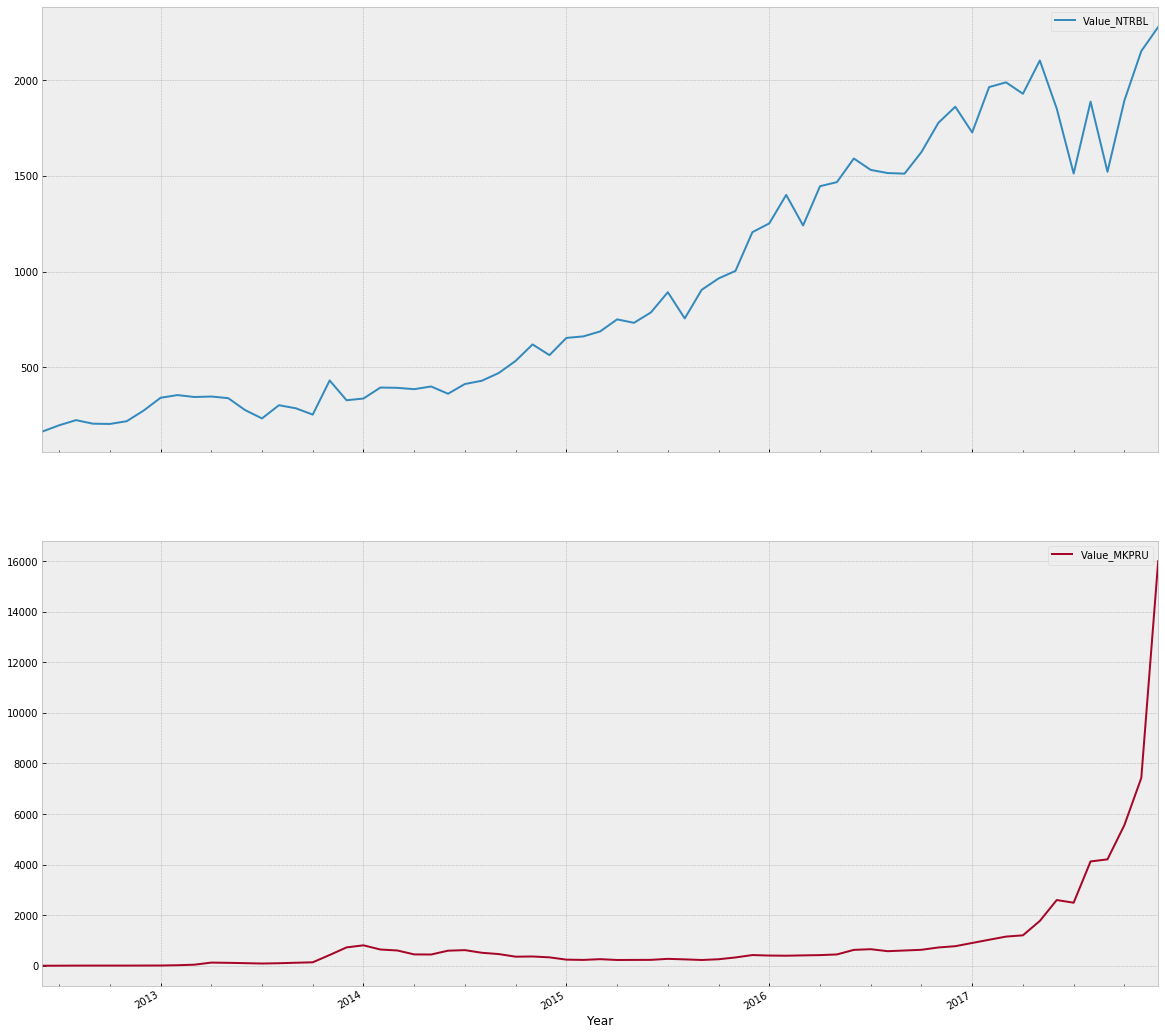

In [7]:
BTC_df[['Value_NTRBL','Value_MKPRU']].iloc[:2000].resample('M').median().plot(subplots=True, figsize=(20,20))
plt.xlabel('Year')
plt.show()

I expected to see a negative correlation between BTC market price and transactions per block (in other words, as the price of BTC increases, fewer transactions are needed).  However, we see that the number of transactions does reach an inflection point around Q1 2017 as the price of BTC doubles and triples from pre-2017 prices.  

Then something interesting happens, it seems the rising market price of BTC attracts more participants (and thus more transactions) into the market. 

Let's see if we can reinforce this notion with determining the number of BTC per transaction...

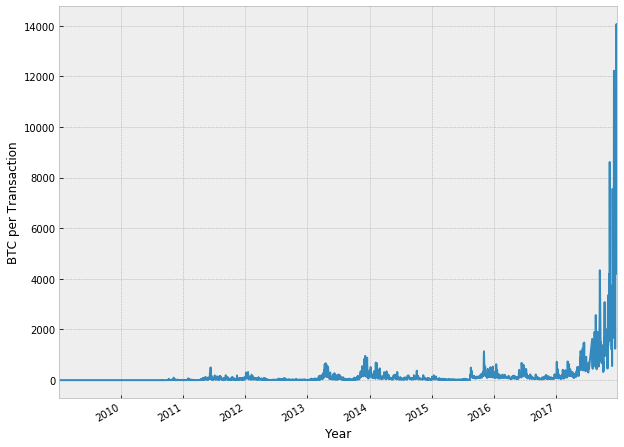

In [8]:
BTC_per_txn = BTC_df['Value_TRVOU']/BTC_df['Value_NTRAN'] 
BTC_per_txn.plot()
plt.xlabel('Year')
plt.ylabel('BTC per Transaction')
plt.show()

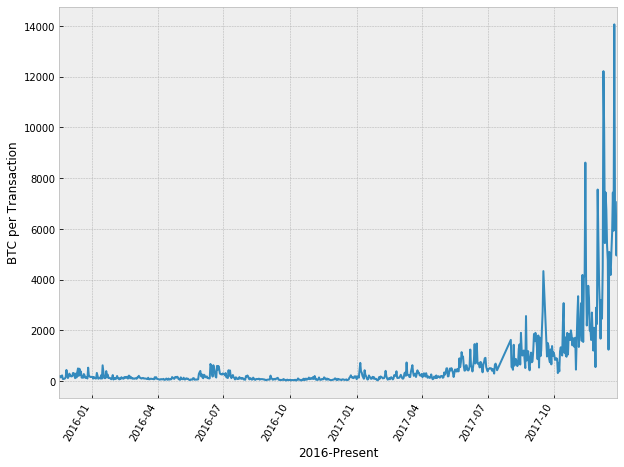

In [9]:
#zooming in on 2016-present, 
BTC_per_txn[:750].plot()
plt.xlabel('2016-Present')
plt.ylabel('BTC per Transaction')
plt.xticks(rotation=60)
plt.show()

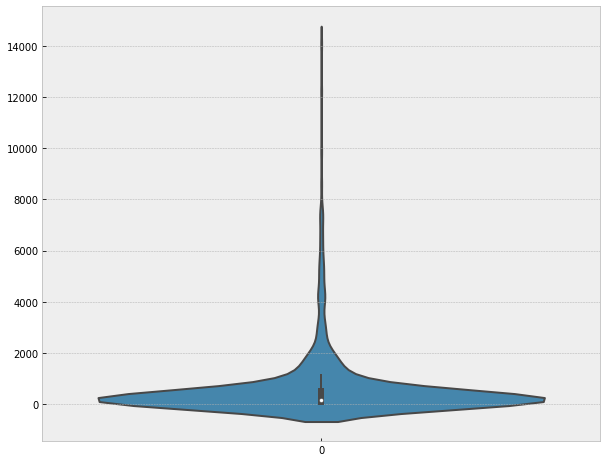

In [10]:
import seaborn as sns
#further visualizing the outlier data or large-quantity trades
sns.violinplot(data=BTC_per_txn[:750])
plt.show()

The violin plot shows that the majority of the BTCs per transaction (daily) are between 0 and around 1,500 units of BTC.  The whiskers of the violin plot are very extreme given the shape of the violin.  

Plotting again, resampling the data on the weekly median data.  

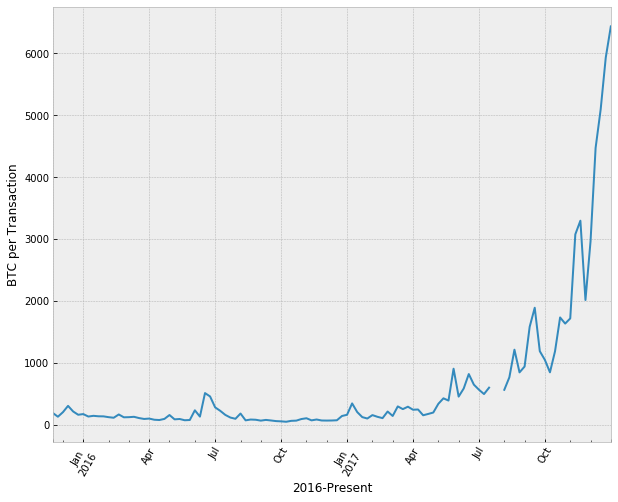

In [11]:
BTC_per_txn[:750].resample('W').median().plot()
plt.xlabel('2016-Present')
plt.ylabel('BTC per Transaction')
plt.xticks(rotation=60)
plt.show()

With the outliers "smoothed" out in the plot, we still see a strong upward trend beggining in 2017 that suggests the size of each transaction is growing almost exponentially.  In the context in the above inferences, more participants are in the market and each participant is transacting larger quantities of Bitcoin (as pre-2017 holders give way to this new market segment). 

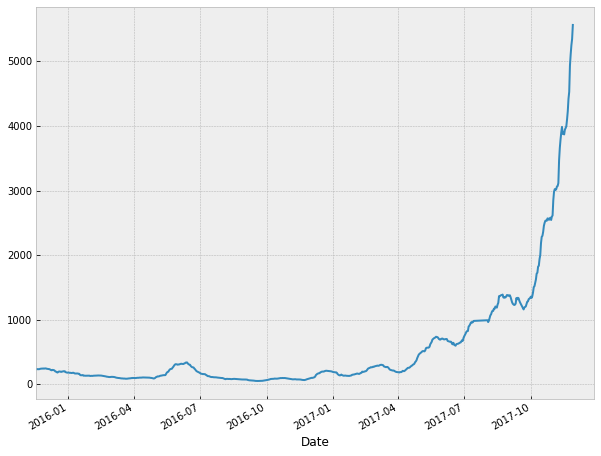

In [15]:
r30 = BTC_per_txn[:750].rolling(window=30).mean().plot()
plt.show()

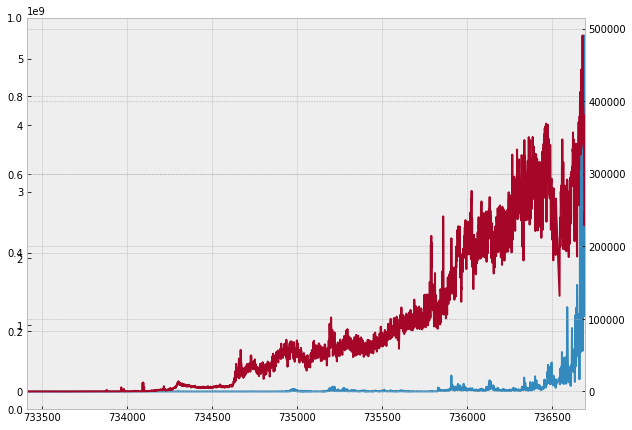

In [26]:
#BTC_per_txn = BTC_df['Value_TRVOU']/BTC_df['Value_NTRAN'] 
fig, ax = plt.subplots(1,1)

ax2 = ax.twinx()

BTC_df['Value_TRVOU'].plot()
BTC_df['Value_NTRAN'].plot(secondary_y=True)
#ax2.set_ylim(0,1000000)
plt.show()

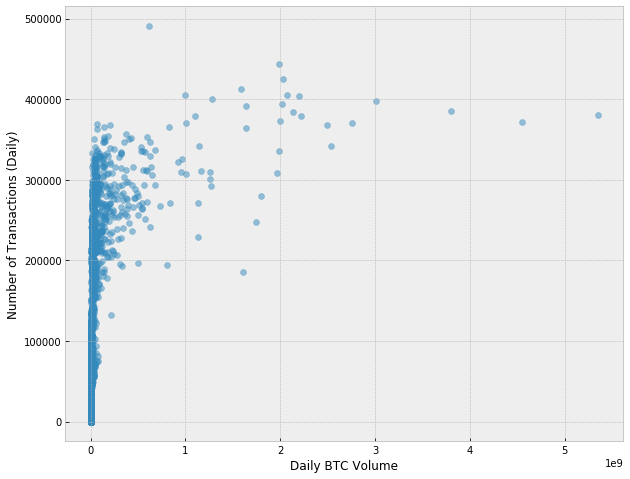

In [33]:
#some scatter plots to see any potential relationships between the series'
plt.scatter(x=BTC_df['Value_TRVOU'], y=BTC_df['Value_NTRAN'], alpha=0.5)
plt.xlabel('Daily BTC Volume')
plt.ylabel('Number of Transactions (Daily)')
plt.show()

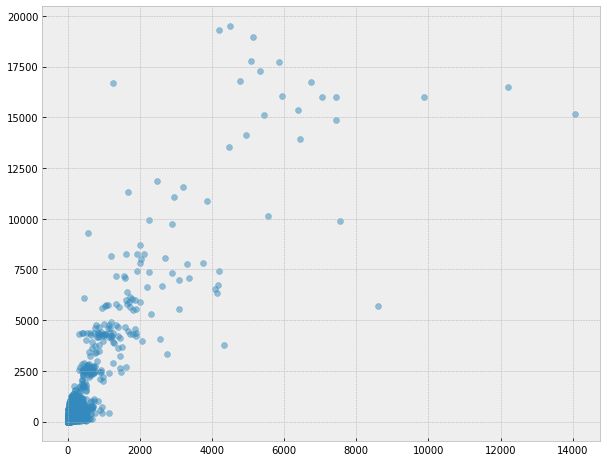

In [37]:
plt.scatter(x=BTC_per_txn, y=BTC_df['Value_MKPRU'], alpha=0.5)
plt.show()

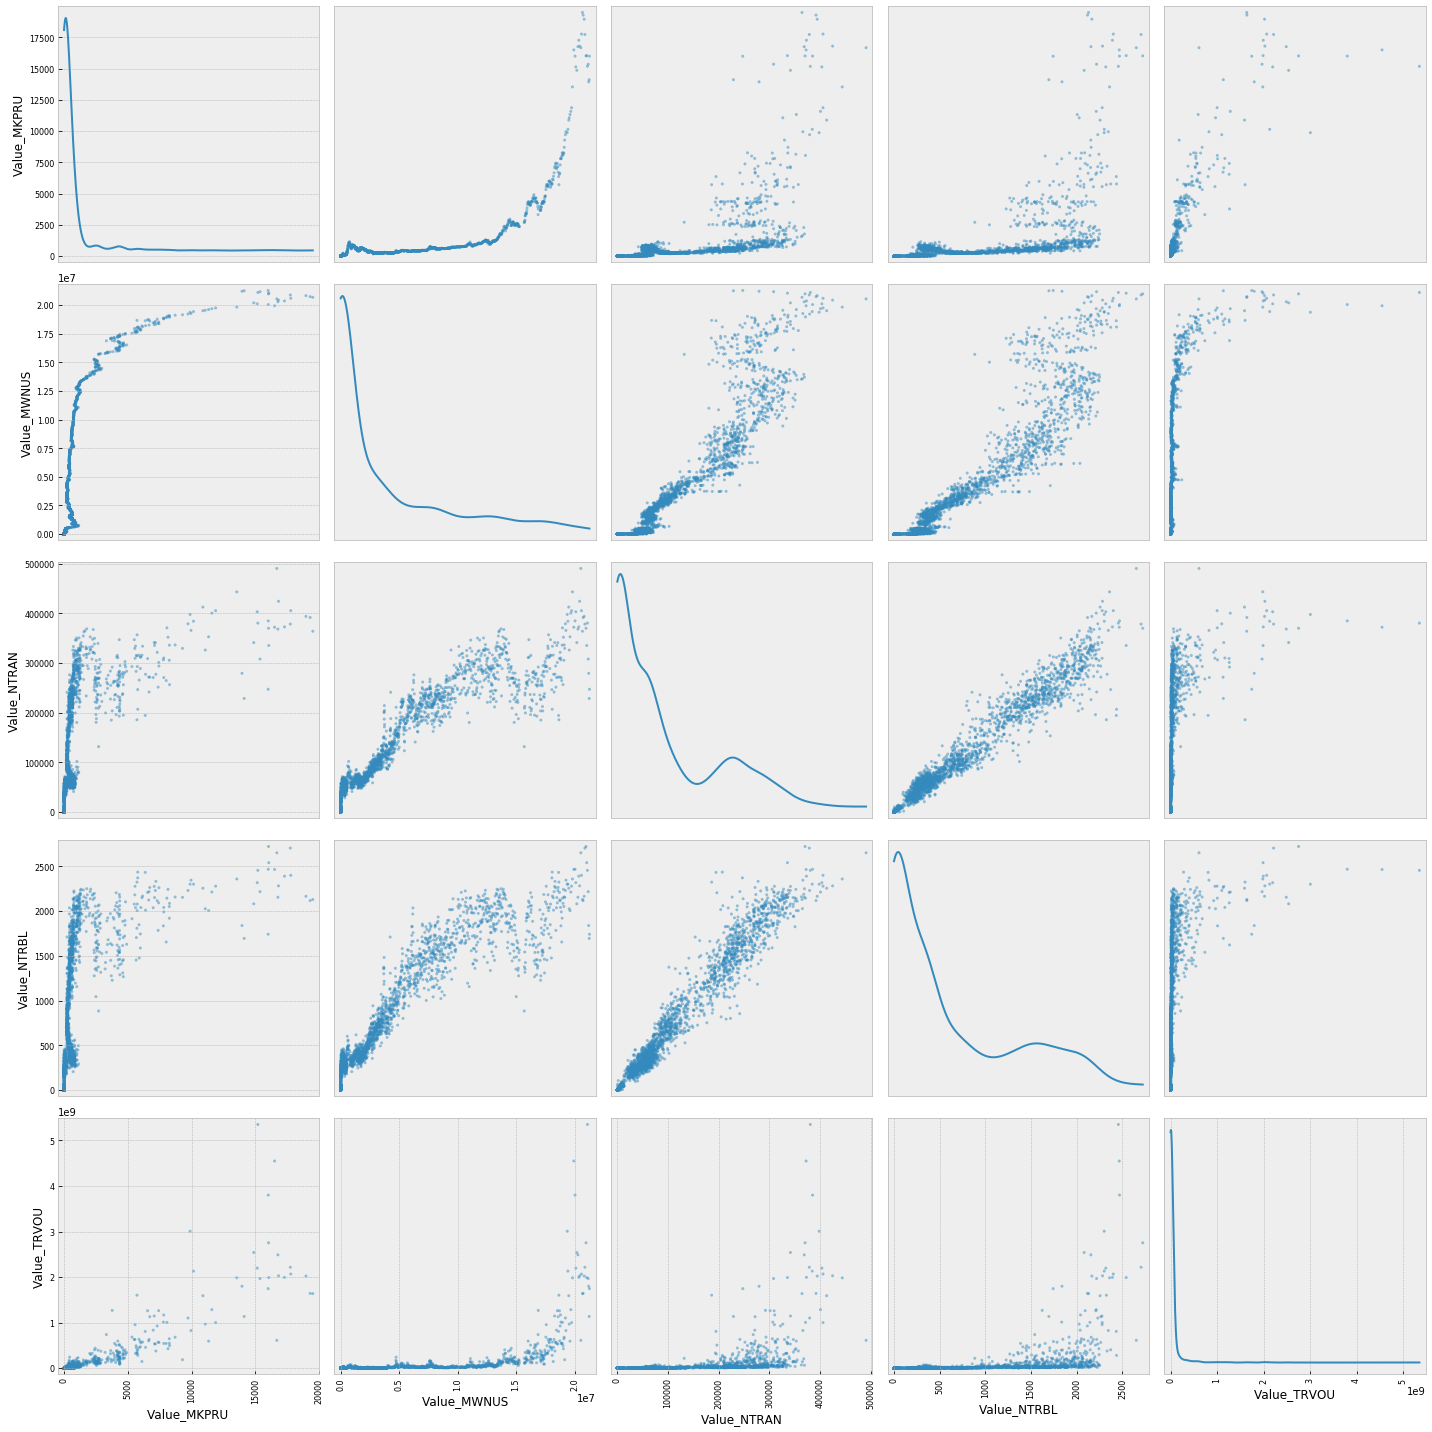

In [39]:
#scatter plotting all series
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()

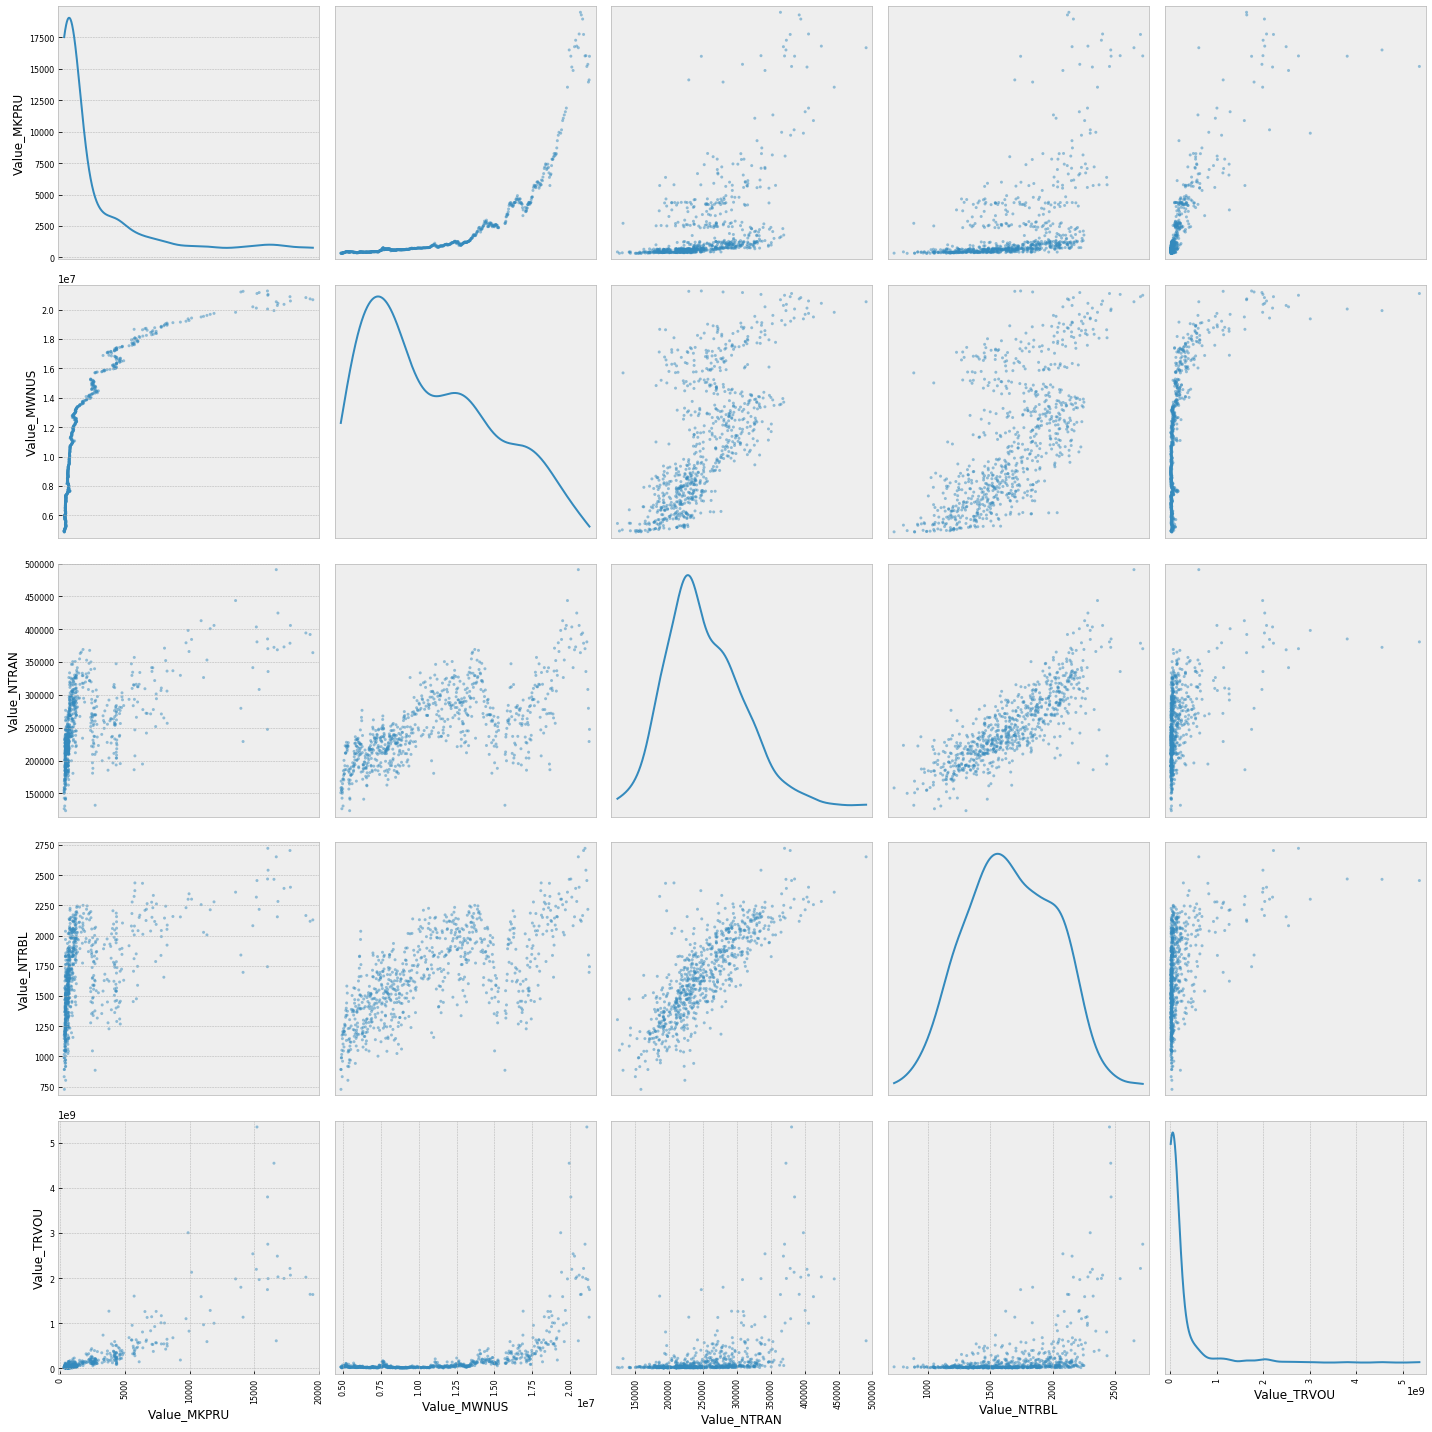

In [41]:
#zooming in on 2016 to present
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']][:750], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()

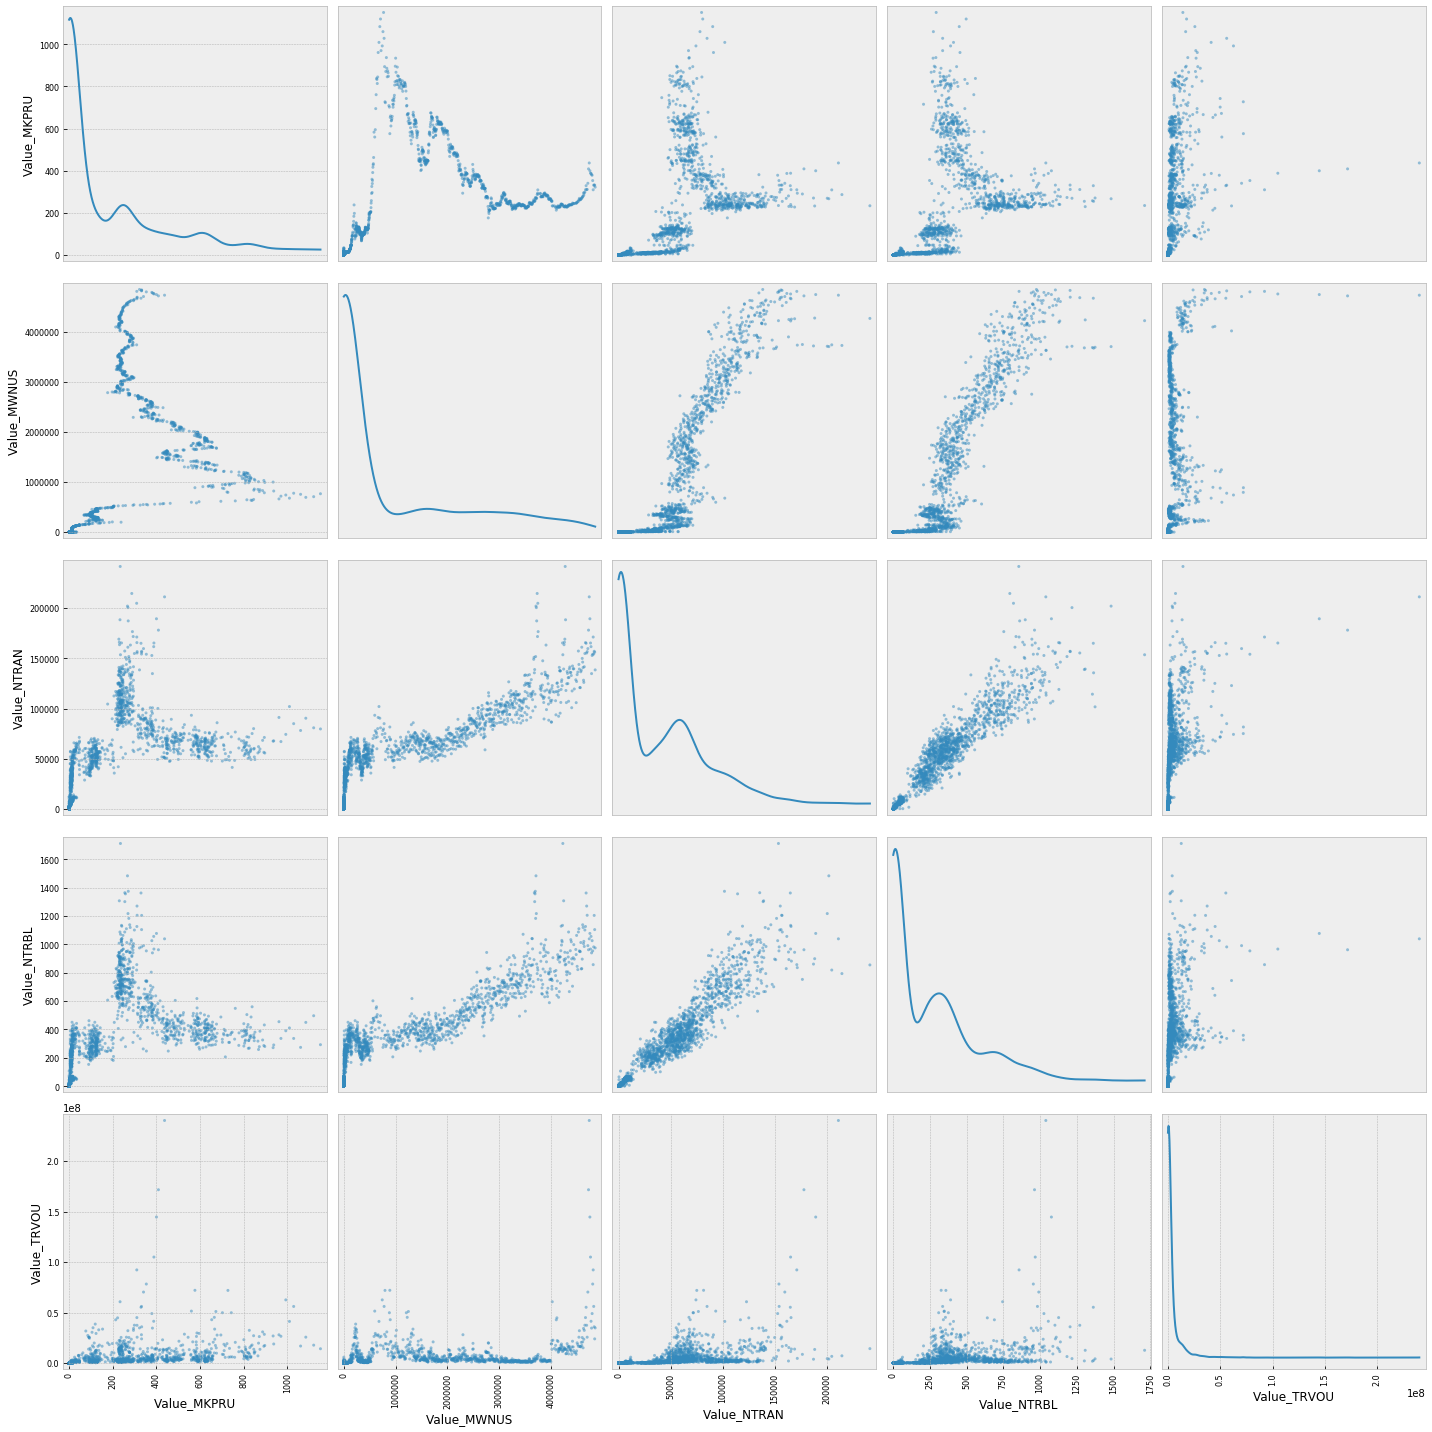

In [42]:
#zooming in on pre-2016
pd.plotting.scatter_matrix(BTC_df[['Value_MKPRU','Value_MWNUS','Value_NTRAN','Value_NTRBL','Value_TRVOU']][750:], diagonal="kde",
                            figsize=(20,20), alpha=0.5)
plt.tight_layout()
plt.show()